#  Interactive Notebook
Demonstration of each stage in the function-based pipeline.

In [1]:
import pandas as pd

In [1]:
df = pd.read_csv('../_Data/merged_all_3_datasets.csv')
df.shape


NameError: name 'pd' is not defined

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Columns: 1943 entries, Unnamed: 0 to label
dtypes: float64(1941), int64(1), object(1)
memory usage: 4.0+ MB


In [9]:
df.rename(columns={"Unnamed: 0": "Sample"}, inplace=True)


In [34]:
df.info()
df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Columns: 1944 entries, Sample to outlier
dtypes: float64(1941), int64(2), object(1)
memory usage: 4.0+ MB


label
1    239
0     32
Name: count, dtype: int64

In [31]:
new = df.drop_duplicates()
new['label'].value_counts()

label
1    170
0     26
Name: count, dtype: int64

In [39]:
df['Sample'].nunique()

196

In [40]:
df.skew(numeric_only=True)

POLE       1.533484
DES        1.092294
SDHB       1.574444
RBPMS      1.383246
DEDD       1.629562
             ...   
CENPK      1.406229
ACD        1.602048
TANK       1.336326
label     -2.380185
outlier   -4.073708
Length: 1943, dtype: float64

In [41]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
df['outlier'] = iso.fit_predict(df.select_dtypes(include='number'))
# Outliers are marked as -1
outliers = df[df['outlier'] == -1]

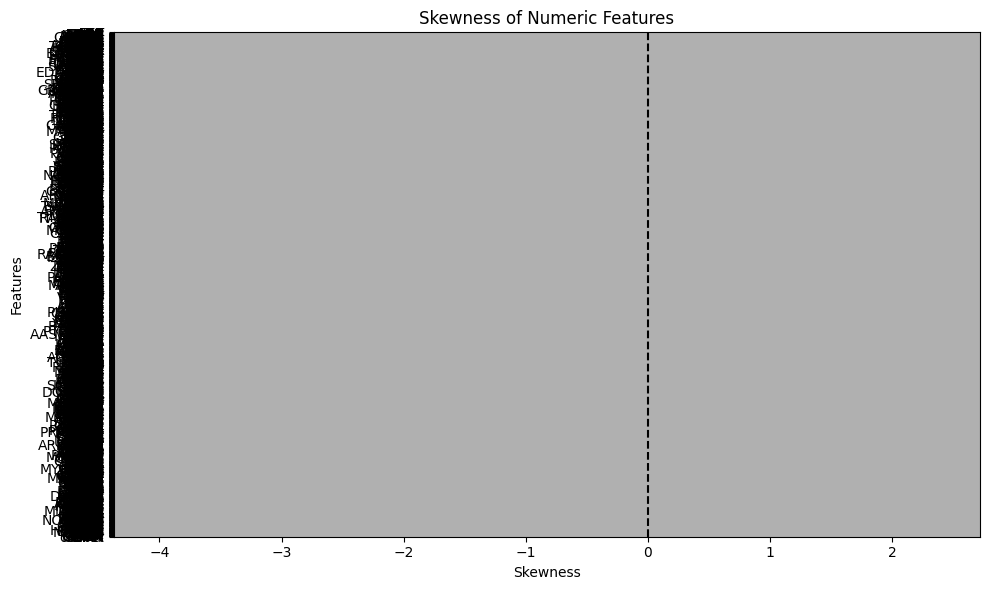

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

numeric_cols = df.select_dtypes(include="number").columns

# Calculate skewness
skew_values = df[numeric_cols].apply(lambda x: skew(x.dropna()))

# Plot
plt.figure(figsize=(10, 6))
skew_values.sort_values().plot(kind='barh')
plt.axvline(x=0, color='black', linestyle='--')
plt.title("Skewness of Numeric Features")
plt.xlabel("Skewness")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
from src.Stage_1_Ingestion.data_loaders import dataLoader
# from src.Stage_2_EPD_Analysis.EDAnalyzer import EDAnalyzer
import warnings
warnings.filterwarnings("ignore")


data_loader = dataLoader("../Data/merged_all_3_datasets.csv","Breast Cancer")

Running single step pipeline to execute step dataLoader
Initiating a new run for the pipeline: dataLoader.
Caching is disabled by default for dataLoader.
Using user: default
Using stack: default
  artifact_store: default
  orchestrator: default
Dashboard URL for Pipeline Run: http://127.0.0.1:8237/projects/default/runs/277f3586-5713-4ba9-978c-204421ed5ef2
Step dataLoader has started.
[dataLoader] Great Expectations not installed—skipping validation.
[dataLoader] Semantic profiling → reports/profiling/flat:merged_all_3_datasets.csv_20250621_023248.json
[dataLoader] flat:merged_all_3_datasets.csv | duplicates=75 rows (logged, not dropped).
[dataLoader] flat:merged_all_3_datasets.csv | rows=    271 | sha256=aa1eca9f08c0
[dataLoader] Data loaded from ../Data/merged_all_3_datasets.csv with shape (271, 1943).
[dataLoader] Data loaded successfully from ../Data/merged_all_3_datasets.csv with shape (271, 1943).
[dataLoader] By default, the PandasMaterializer stores data as a .csv file. If you w